<a href="https://colab.research.google.com/github/KacperGrodecki/image_proccessing/blob/main/kuba_img_manip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Ign:13 https://developer.download.nvidia.com/compute/c

In [3]:
!apt-get install poppler-utils 
!apt-get install tesseract-ocr-pol
!apt-get install libleptonica-dev 
!apt-get install tesseract-ocr
!apt-get install tesseract-ocr-dev
!apt-get install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (202 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 160975 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-en

In [4]:
pip install pdf2image

In [5]:
pip install pytesseract 

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=c334b12090d3d5481da64badf5d471959b68483210b3414c9629d9106badb61e
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [6]:
pip install autocorrect

     |████████████████████████████████| 624kB 8.4MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.3.0-cp37-none-any.whl size=621587 sha256=0a6b7445bfccd1fade859d04febe6b8d61bc69d5eaf8640f3b35977f488e7ba1
  Stored in directory: /root/.cache/pip/wheels/cc/1c/30/6b0199afbd20eef5959f5eaa0ead86aeef84391740482b2279
Successfully built autocorrect


In [7]:
from PIL import Image 
import pytesseract 
import sys 
from pdf2image import convert_from_path 
import os
import pandas as pd
import cv2 
from pdf2image import pdfinfo_from_path,convert_from_path
import os
from PIL import Image
from pytesseract import image_to_string
import numpy as np
from matplotlib import pyplot as plt
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
from autocorrect import Speller
from matplotlib.pyplot import figure


In [8]:
spell = Speller('pl')

dictionary for this language not found, downloading...
__________________________________________________
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
done!


In [16]:
def fig_prepare(file):
  image = cv2.imread(file)
  kernel_3x3 = np.ones((3, 3), np.float32) / 9

  kernel_sharpening = np.array([[-1,-1,-1], 
                                [-1, 9,-1],
                                [-1,-1,-1]])

  blurred = cv2.filter2D(image, -1, kernel_3x3)
  sharpened = cv2.filter2D(blurred, -1, kernel_sharpening)

  blurred = cv2.filter2D(sharpened, -1, kernel_3x3)
  sharpened = cv2.filter2D(blurred, -1, kernel_sharpening)

  lower=np.array([0,0,0])
  upper=np.array([100,100,100])

  mask = cv2.inRange(sharpened, lower, upper)
  #figure(figsize=(20,20))
  #plt.imshow(255-mask)
  #plt.show()    
  
  return 255-mask

In [10]:
def text_from_image(image):
  image_correct=fig_prepare(image)
  custom_config_letters = r'--oem 3 --psm 3'
  custom_config_digits = r'--oem 3 --psm 3 outputbase digits'
  return (image_to_string(image_correct, lang='pol',config=custom_config_letters)),(image_to_string(image_correct, lang='pol',config=custom_config_digits))

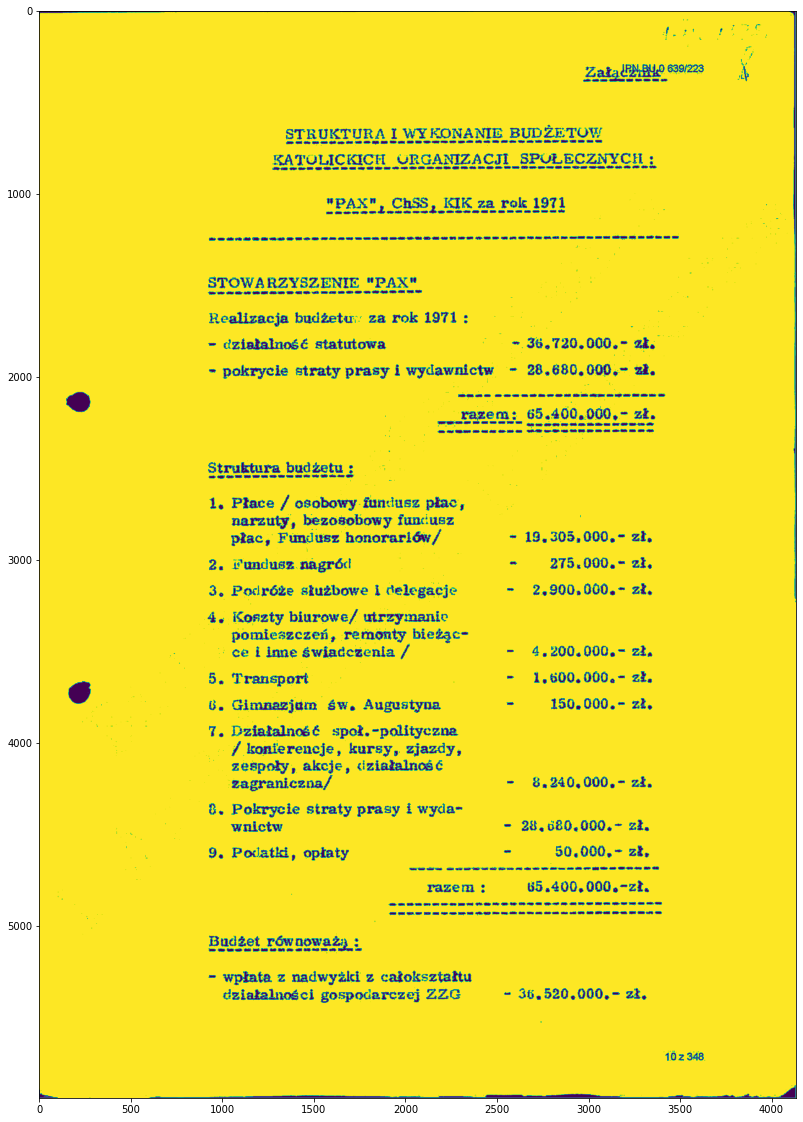

In [11]:
myText,myDigits=text_from_image('drive/MyDrive/kuba/resolution500/fig1.jpg')

In [ ]:
print(spell(myText))

 

ZałaliiMO s |

STRUKTURA I WYKONANE BUDŹZE TW

| aconnadhocdannni due dA wk 4 UE ZA WER RM RO RE W NY W. AW NM W idz wały dnie gier um hw misię Tie DW AW NK Z (A AA W

RATOLICKAICH URGANIZAĄCJI SPUŁECZNYCIH :

iR rami w W R RW M IW MA a GK uli daw wyk ww NR Z. wanie wana ód OI OA: a Halik RO W do: nh IE pó: Na: wa: NK a orze om Gi A a 0 20 M0

"AR", Ch55, IK za rok 1971

na me oz 29 małe | odkonatkocadanclinnaj Łoże mm oe z m om 00 0 M e

ST WA: RZYSZENIE * "PAN

idealizacja budżetu: za rok 1971: SE |
- działalność statutowa || - 36.720.,000,- £Ł,
= pokrycie straty prasy i wydawnictw — 28.680, .00Bi= zł,

, -_.fazami_6 65, 2400, -000,- zł.

Struktura budżetu :
1. Płace / osobowy. fundusz płac,
narzuty, bezosobowy fundusz |
płac, Fundusz honorariów/ - 13.305,000,- zł,

2a ii "fundusz nagród | - 275.000," zł,
3, Podróże służbowe 1 delegacje - 2.,200.000,- zł,

4, koszty biurowe/ trzy:nanie
pomieszczeń, remonty bieżąco=

| ce i inne świadczenia / - 4,200.000.- zł,
35. ITrauspori | | - 

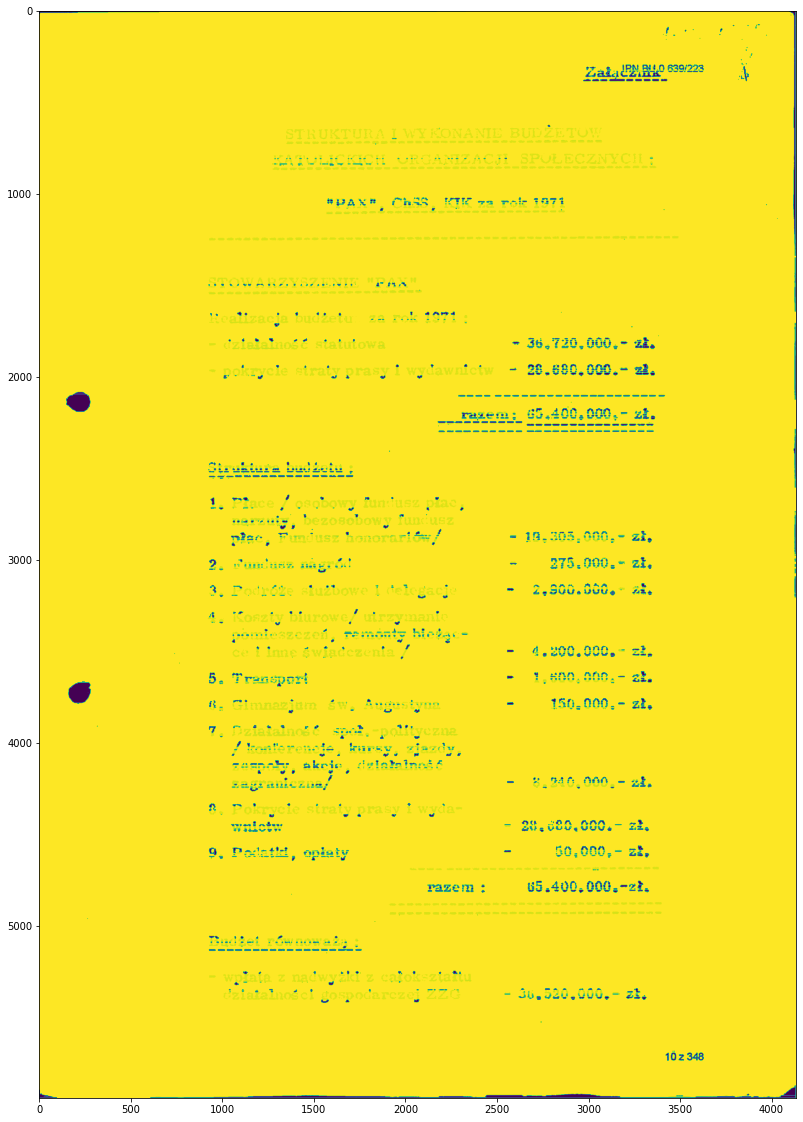

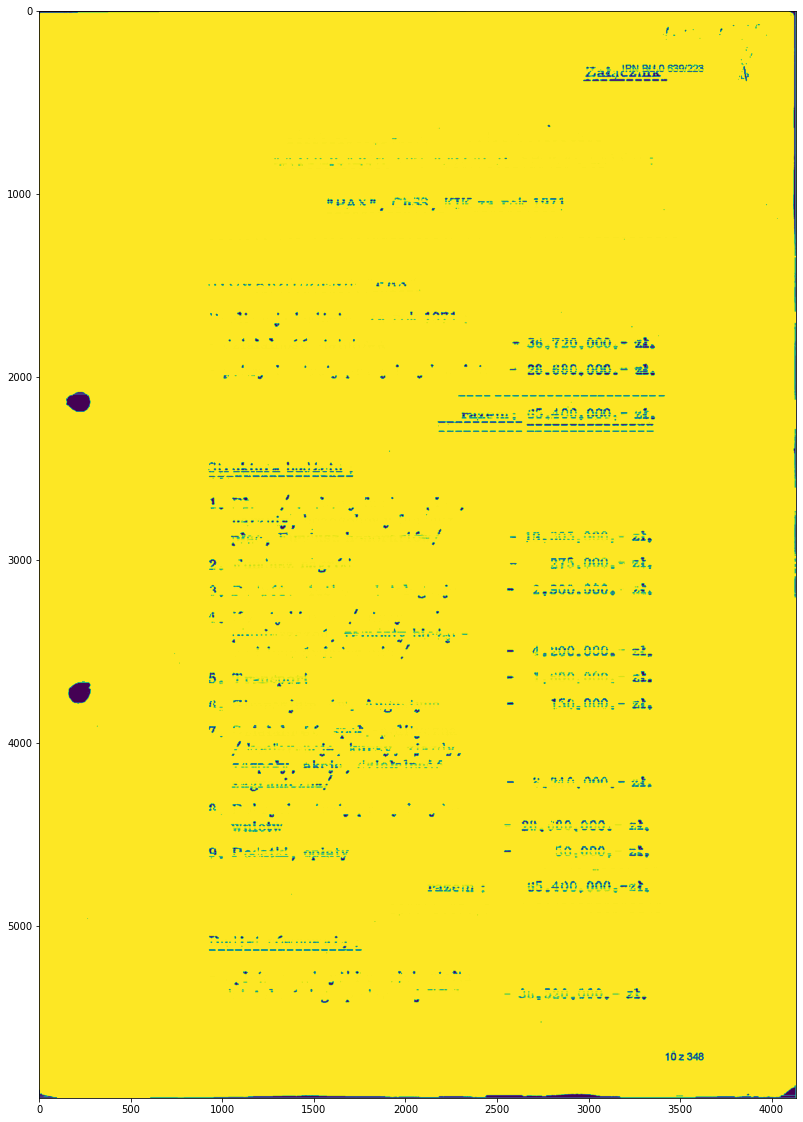

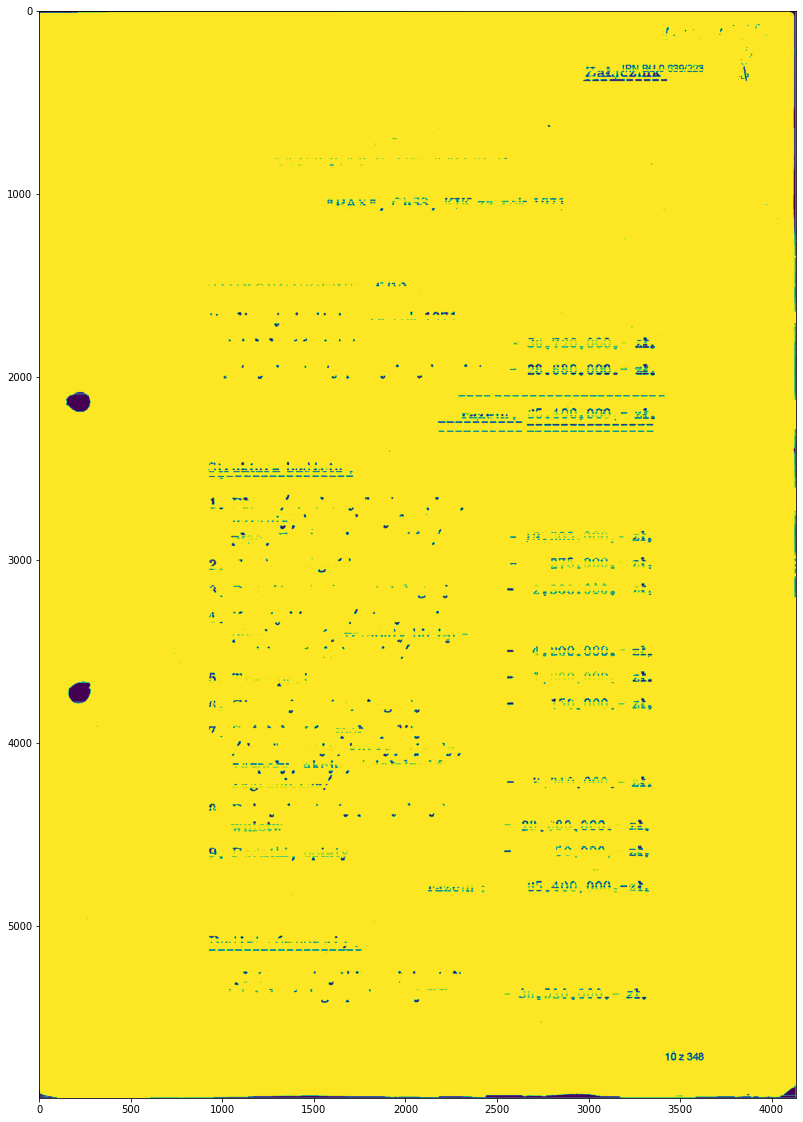

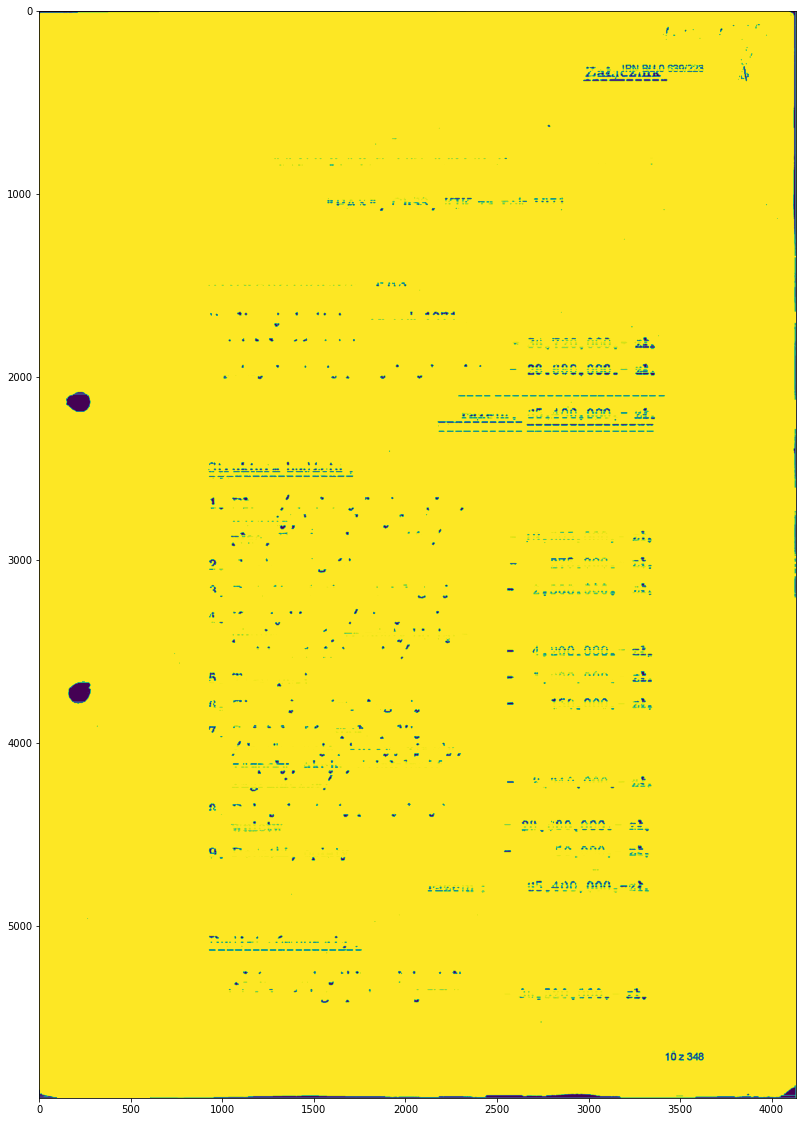

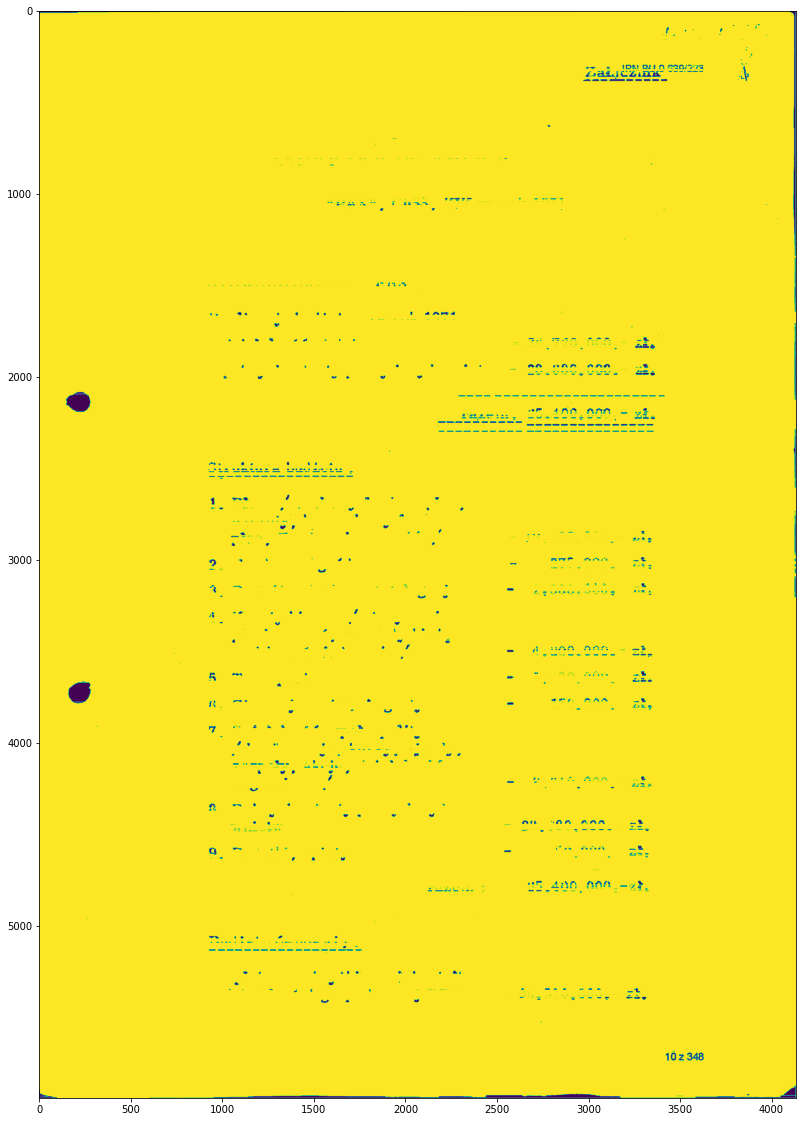

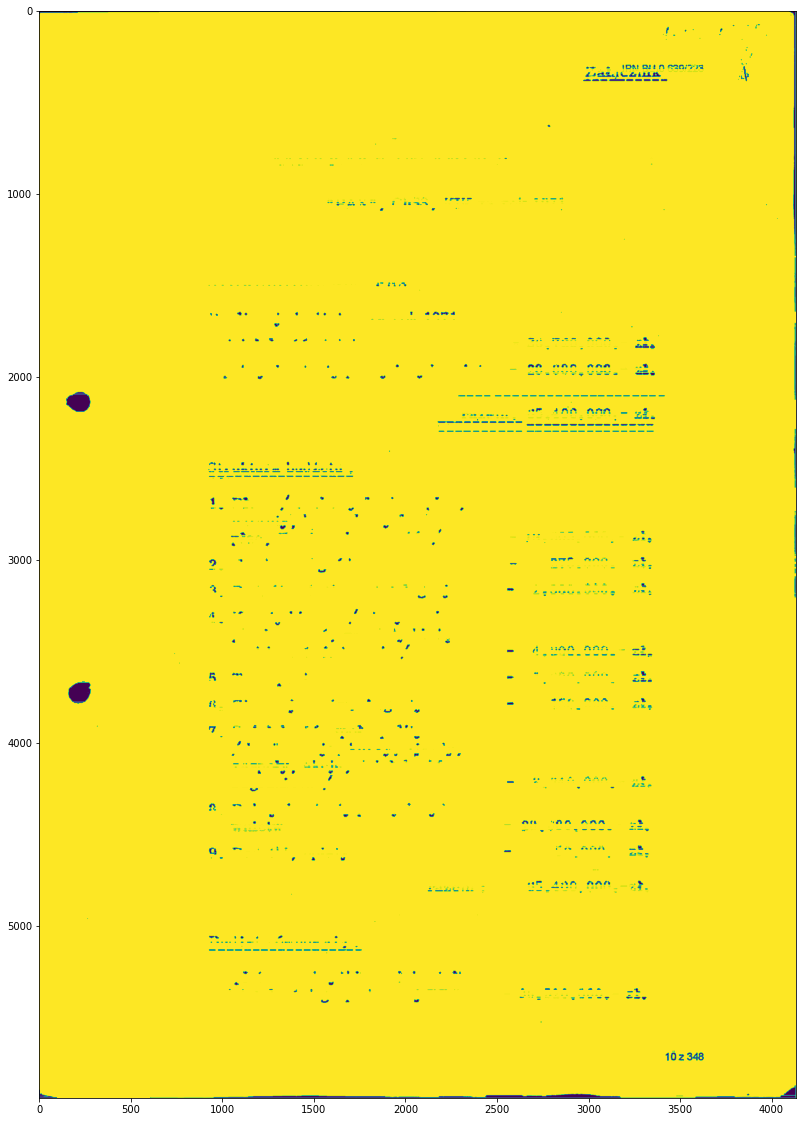

In [86]:
gray=fig_prepare('drive/MyDrive/kuba/resolution500/fig1.jpg')
gray=gray

edges = cv2.Canny(gray,50,150,apertureSize = 3)
for i in [10,20,50,100,200,500]:
  minLineLength=i
  lines = cv2.HoughLinesP(image=edges,rho=1,theta=np.pi/180, threshold=100,lines=np.array([]), minLineLength=minLineLength,maxLineGap=80)

  a,b,c = lines.shape
  for i in range(a):
    x = lines[i][0][0] - lines [i][0][2]
    y = lines[i][0][1] - lines [i][0][3]
    if x!= 0:
        if abs(y/x) <1:
            cv2.line(gray, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (255, 255, 255), 1, cv2.LINE_AA)

  se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE , (3,3))
  gray = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, se)
  figure(figsize=(20,20))
  plt.imshow(gray)
  plt.show()  



In [ ]:
print(spell(image_to_string(255-img2, lang='pol')))

 

 

FOR

 

STOWARZYSZENIE "PAN

paz każda)

In | budżet: za rok 1971:

- cieżalsość statutory NESECPA ŁPU E

strata pray i wydawnictw = 28.680,000.— zż,

t
I
a
[al
E
Ę
a

 

OS

 

 

 

CZE AE

1, Płace / osobowy fuudusz pic,

 

naruto, bezosobowy fungus

pic, Funds honoraryów — 18.305,000,- zi,
2. Funds naród z 278.000." zż,
3 Pooróże służbowl i delegate - 2,900.000.- zż,

ż, koszty biurowe/ wirzymanie
pomieszczeń, remote bieżące

 

ce i mie świadczenia / - 4,200.000a— zża

5. Transport i U

6, Gimnazjum ów, Augustana - 150.000.- zi,
SL: toSTOZNC 200 Of TE
komierencje, jury, zjazdy,

m

 

 

 

zespoy, acre, diażełność
zagraniczna/ EE
8, Posrycie strata pray i way-
gy Ns - 28,U080,000.7 zż.
9, Podatli, opacity - KOPIEJKA
razed: PEZEDER T

 

 

 

 

ERSWIECZA

-— wpłata z navyżłe
R OLY Z sic:

3 a
ej
U
>)
N
G
Lt
Ns
U
i
t
[K)
[=
P
Ur
E
)
c
za
=)
[
5
lad
D

IDE

 

 

